In [1]:
import datatable as dt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
from time import time
from datatable import f, sum
%matplotlib inline

In [2]:
report = []

for n in [1000, 10000, 100000, 1000000, 10**7, 10**8]:
    for k in [10, 100, 1000, 10000, 100000, 1000000]:
        # n is the number of observations
        # k is the number of groups (approximate)
        if k > n: continue
        data_id = np.random.randint(k, size=n, dtype="int32")
        data_val = np.random.randn(n)
        pf0 = pd.DataFrame({"id": data_id, "val": data_val})
        df0 = dt.Frame(pf0)
        for lib in ["datatable", "pandas"]:
            t0 = time()
            if lib == "datatable":
                res = df0[:, sum(f.val), f.id]
                n1 = res.nrows
            else:
                res = pf0.groupby("id").agg({"val": "sum"})
                n2 = res.shape[0]
            t1 = time()
            report.append([lib, n, k, t1 - t0])
            print("[%-9s]: n=%d k=%d time=%f" % (lib, n, k, t1 - t0))
        assert n1 == n2


[datatable]: n=1000 k=10 time=0.000743
[pandas   ]: n=1000 k=10 time=0.002502
[datatable]: n=1000 k=100 time=0.000609
[pandas   ]: n=1000 k=100 time=0.001972
[datatable]: n=1000 k=1000 time=0.000268
[pandas   ]: n=1000 k=1000 time=0.001534
[datatable]: n=10000 k=10 time=0.000356
[pandas   ]: n=10000 k=10 time=0.001666
[datatable]: n=10000 k=100 time=0.000335
[pandas   ]: n=10000 k=100 time=0.001825
[datatable]: n=10000 k=1000 time=0.000808
[pandas   ]: n=10000 k=1000 time=0.002297
[datatable]: n=10000 k=10000 time=0.000709
[pandas   ]: n=10000 k=10000 time=0.002392
[datatable]: n=100000 k=10 time=0.001699
[pandas   ]: n=100000 k=10 time=0.005397
[datatable]: n=100000 k=100 time=0.001463
[pandas   ]: n=100000 k=100 time=0.003755
[datatable]: n=100000 k=1000 time=0.001696
[pandas   ]: n=100000 k=1000 time=0.004224
[datatable]: n=100000 k=10000 time=0.003002
[pandas   ]: n=100000 k=10000 time=0.006393
[datatable]: n=100000 k=100000 time=0.005144
[pandas   ]: n=100000 k=100000 time=0.01511

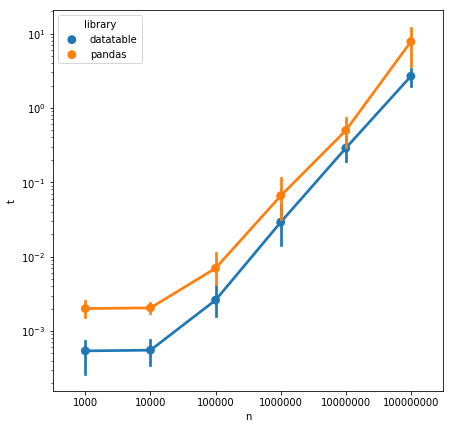

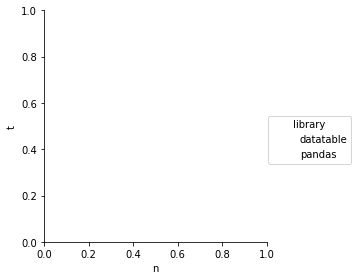

In [3]:
data = pd.DataFrame(report, columns=["library", "n", "k", "t"])
_, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")
_ = sns.factorplot(x="n", y="t", hue="library", data=data, ax=ax)

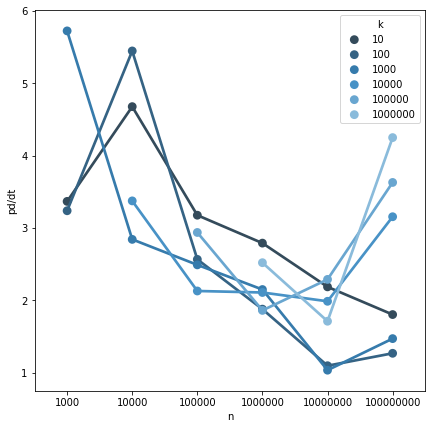

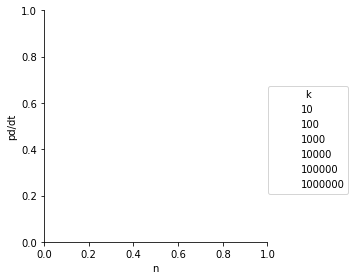

In [4]:
df1 = dt.Frame(data)
df2 = dt.Frame().cbind(
  df1[f.library == "datatable", {"n": f.n, "k": f.k, "dt": f.t}],
  df1[f.library == "pandas", {"pd": f.t}]
)
df3 = df2[:, {"n": f.n, "k": f.k, "pd/dt": f.pd / f.dt}]
_, ax = plt.subplots(figsize=(7, 7))
sns.factorplot(x="n", y="pd/dt", hue="k", palette="Blues_d", data=df3.topandas(), ax=ax)